In [7]:
# import necessary libraries
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from PIL import Image

In [2]:
# glob to get all the csv files 
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

concat_files = []

# Loop over the list of csv files
for f in csv_files:    
    # read the csv file
    df = pd.read_csv(f, skiprows=1)
    
    # clean up columns and concat files
    df.rename(columns={df.columns[1]: df.columns[1][:-13]}, inplace=True)
    concat_files.append(df)

data = pd.concat(concat_files,axis=1)

# drop dups columns (week)
data = data.loc[:,~data.columns.duplicated()]

# replace all <1 values with 0
data.replace(to_replace ='<1', value =0, inplace=True)

# convert week column from str to date
data['Week'] = pd.to_datetime(data.Week)

# convert all str columns to int
data[data.columns[data.dtypes == 'O']] = data[data.columns[data.dtypes == 'O']].astype(int)

In [3]:
data.head(5)

,Week,Joe Biden,Covid,Hurricane Ida,Alec Bladwin,Pete Davidson,Christian Eriksen,Simone Biles,olympics 2020,"drivers license, Olivia Rodrigo",...,Cruella,FIFA 22,covid vaccine,Euro 2021,Copa America,DMX,Squid Game,Afghanistan,Dogecoin,Stimulus Check
0,2020-12-20,10,79,0,0,13,0,1,0,0,...,1,0,28,0,0,1,0,2,2,50
1,2020-12-27,9,85,0,0,7,0,0,0,0,...,2,0,36,0,0,1,0,2,3,100
2,2021-01-03,20,88,0,7,5,0,0,0,0,...,1,0,47,0,0,1,0,2,6,59
3,2021-01-10,17,88,0,7,7,0,1,0,0,...,1,0,70,0,0,1,0,2,3,28
4,2021-01-17,100,82,0,7,7,0,1,0,0,...,1,0,69,0,0,1,0,3,2,24


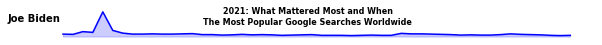

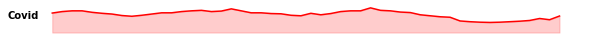

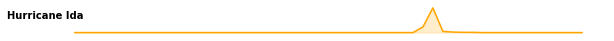

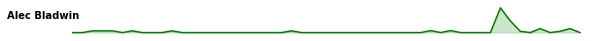

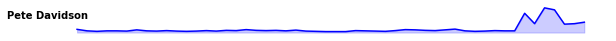

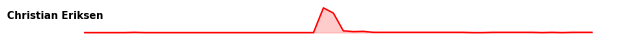

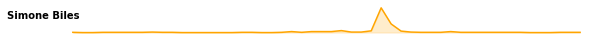

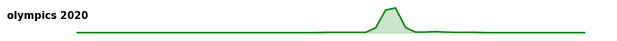

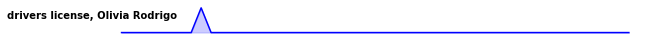

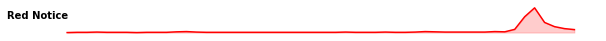

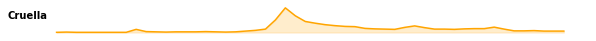

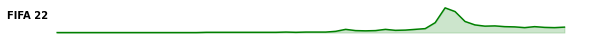

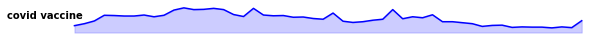

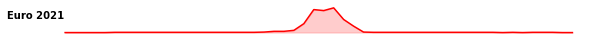

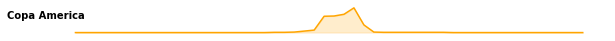

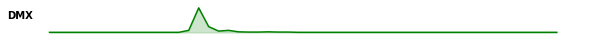

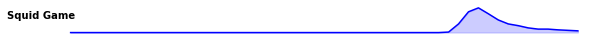

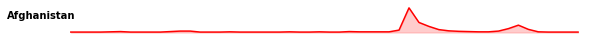

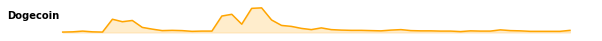

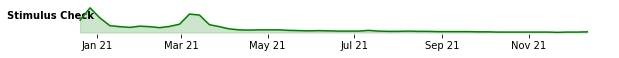

In [6]:
# create x, y to plot
x = data['Week']
features_list = list(data.columns[1:])

colors = ['b', 'r', 'orange', 'g', 
         'b', 'r', 'orange', 'g', 
         'b', 'r', 'orange', 'g', 
         'b', 'r', 'orange', 'g', 'b', 'r', 'orange', 'g']

for feature, c in zip(features_list, colors):
    fig, ax = plt.subplots(figsize=(10,0.5))
    dtFmt = mdates.DateFormatter('%b %y')
    ax.xaxis.set_major_formatter(dtFmt)
    if feature !='Stimulus Check':
        plt.xticks([])
    
    if feature =='Joe Biden':
        fig.suptitle("2021: What Mattered Most and When" + "\n" + "The Most Popular Google Searches Worldwide", fontweight='bold', size=8)
    plt.plot(x, data[feature], color=c)
    plt.fill_between(x, data[feature], color=c, alpha=0.2)
    ax.set_facecolor('white')
    plt.ylabel(feature, fontweight='bold', rotation = 360)
    plt.yticks([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    fig.savefig(feature)


##### the code above will generate the plot and save each fig separately

In [15]:
# create a function that merges images vertically or horizontally

# get files path
images_files = glob.glob(os.path.join(path, "*.png"))

# get images name and store in a list
images_name = [file[34:] for file in images_files]

def merge_images_horizontally(imgs):
    '''
    This function merges images horizontally.
    '''
    #create two lists - one for heights and one for widths
    widths, heights = zip(*(i.size for i in imgs))
    width_of_new_image = sum(widths)
    height_of_new_image = min(heights) #take minimum height
    # create new image
    new_im = Image.new('RGB', (width_of_new_image, height_of_new_image))
    new_pos = 0
    for im in imgs:
        new_im.paste(im, (new_pos,0))
        new_pos += im.size[0] #position for the next image
    new_im.save('imgs_h.jpg') #change the filename if you want


def merge_images_vertically(imgs):
    '''
    This function merges images vertically
    '''
    #create two lists - one for heights and one for widths
    widths, heights = zip(*(i.size for i in imgs))
    width_of_new_image = min(widths)  #take minimum width
    height_of_new_image = sum(heights)
    # create new image
    new_im = Image.new('RGB', (width_of_new_image, height_of_new_image))
    new_pos = 0
    for im in imgs:
        new_im.paste(im, (0, new_pos))
        new_pos += im.size[1] #position for the next image
    new_im.save('imgs_v.jpg') #change the filename if you want


def main():
    '''
    Start of the code.
    '''
    # open images files
    imgs = [Image.open(im) for im in list_im]
    ###merge images horizontally
    merge_images_horizontally(imgs)
    ###merge images vertically
    merge_images_vertically(imgs)


#list of images
# list_im = ['Covid.png', 'Afghanistan.png'] #change it to use your individual images
list_im = images_name # or store in a list

if __name__ == '__main__':
    '''
    This program merges images horizontally and Vertically.
    '''
    main()